###Import library

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Loading the dataset

In [3]:
df = pd.read_csv('/content/Dataset.csv')

#### Inspecting the dataset

In [4]:
print(df.head())

           Entity Code  Year  Deaths_Rate
0     Afghanistan  AFG  1990        31.83
1         Albania  ALB  1990        24.78
2         Algeria  DZA  1990        28.78
3  American Samoa  ASM  1990        24.21
4         Andorra  AND  1990        21.23


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6150 entries, 0 to 6149
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entity       6150 non-null   object 
 1   Code         6150 non-null   object 
 2   Year         6150 non-null   int64  
 3   Deaths_Rate  6150 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 192.3+ KB
None


In [6]:
print(df.describe())

              Year  Deaths_Rate
count  6150.000000  6150.000000
mean   2004.500000    23.265782
std       8.656145     2.477552
min    1990.000000    15.090000
25%    1997.000000    21.380000
50%    2004.500000    22.990000
75%    2012.000000    24.960000
max    2019.000000    33.290000


###Data Cleaning

In [7]:
print(df.isnull().sum())

Entity         0
Code           0
Year           0
Deaths_Rate    0
dtype: int64


In [8]:
df = df.dropna()

In [9]:
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 Entity         0
Code           0
Year           0
Deaths_Rate    0
dtype: int64


In [11]:
df['Entity'] = df['Entity'].astype(str)
df['Code'] = df['Code'].astype(str)
df['Year'] = df['Year'].astype(int)
df['Deaths_Rate'] = df['Deaths_Rate'].astype(float)

In [12]:
print(df.dtypes)

Entity          object
Code            object
Year             int64
Deaths_Rate    float64
dtype: object


In [13]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [14]:
df = df.drop_duplicates()

In [15]:
print("Number of duplicate rows after cleaning:", df.duplicated().sum())

Number of duplicate rows after cleaning: 0



### Data Integration

There is an issue integrating the API data with the dataset.
Additionally, scraping the data is not feasible.
This needs further investigation to resolve the integration problem.


In [16]:
'''
import requests

params = {
    "B_1": "D76.V1-level1", # Group by Year
    "M_1": "D76.M1",   # Deaths, must be included
    "M_2": "D76.M2",   # Population, must be included
    "M_3": "D76.M3",   # Crude rate, must be included
    "M_31": "D76.M31", # Standard error (crude rate)
    "M_32": "D76.M32", # 95% confidence interval (crude rate)
    "M_41": "D76.M41", # Standard error (age-adjusted rate)
    "M_42": "D76.M42", # 95% confidence interval (age-adjusted rate)
    "F_D76.V1": ["*All*"], # year/month
    "F_D76.V2": ["G00-G98"], # ICD-10 Codes (Diseases of the nervous system)
    "I_D76.V1": "*All* (All Dates)",  # year/month
    "I_D76.V2": "G00-G98 (Diseases of the nervous system)", # ICD-10 Codes
    "V_D76.V7": "*All*",    # Gender
    "V_D76.V8": "*All*",    # Race
    "V_D76.V21": "*All*",   # Place of Death
}

# Define a function to create the XML parameter list
def createParameterList(params):
    xml_params = ""
    for key, value in params.items():
        if isinstance(value, list):
            for item in value:
                xml_params += f"  <parameter>\n    <name>{key}</name>\n    <value>{item}</value>\n  </parameter>\n"
        else:
            xml_params += f"  <parameter>\n    <name>{key}</name>\n    <value>{value}</value>\n  </parameter>\n"
    return xml_params

# Create the XML request
xml_request = "<request-parameters>\n"
xml_request += createParameterList(params)
xml_request += "</request-parameters>"

# Define the URL for the CDC Wonder data request
url = "https://wonder.cdc.gov/controller/datarequest/D76"

# Make the request to the CDC Wonder API
response = requests.post(url, data={"request_xml": xml_request})

# Check if the request was successful and print the response
if response.status_code == 200:
    data = response.text
    print(data)
else:
    print("Something went wrong. Status code:", response.status_code)

'''

'\nimport requests\n\nparams = {\n    "B_1": "D76.V1-level1", # Group by Year\n    "M_1": "D76.M1",   # Deaths, must be included\n    "M_2": "D76.M2",   # Population, must be included\n    "M_3": "D76.M3",   # Crude rate, must be included\n    "M_31": "D76.M31", # Standard error (crude rate)\n    "M_32": "D76.M32", # 95% confidence interval (crude rate)\n    "M_41": "D76.M41", # Standard error (age-adjusted rate)\n    "M_42": "D76.M42", # 95% confidence interval (age-adjusted rate)\n    "F_D76.V1": ["*All*"], # year/month\n    "F_D76.V2": ["G00-G98"], # ICD-10 Codes (Diseases of the nervous system)\n    "I_D76.V1": "*All* (All Dates)",  # year/month\n    "I_D76.V2": "G00-G98 (Diseases of the nervous system)", # ICD-10 Codes\n    "V_D76.V7": "*All*",    # Gender\n    "V_D76.V8": "*All*",    # Race\n    "V_D76.V21": "*All*",   # Place of Death\n}\n\n# Define a function to create the XML parameter list\ndef createParameterList(params):\n    xml_params = ""\n    for key, value in params.it

###Data Analysis

In [17]:
# Summary Statistics of Death Rates
summary_stats = df['Deaths_Rate'].describe()
print("Summary Statistics of Death Rates:")
print(summary_stats)

Summary Statistics of Death Rates:
count    6150.000000
mean       23.265782
std         2.477552
min        15.090000
25%        21.380000
50%        22.990000
75%        24.960000
max        33.290000
Name: Deaths_Rate, dtype: float64



Average Death Rate by Year:
Year
1990    22.871415
1991    22.885073
1992    22.926293
1993    22.971220
1994    22.996195
1995    23.033610
1996    23.065073
1997    23.093122
1998    23.128585
1999    23.148732
2000    23.172049
2001    23.178390
2002    23.257805
2003    23.290244
2004    23.309171
2005    23.334146
2006    23.372000
2007    23.377902
2008    23.414146
2009    23.425805
2010    23.439512
2011    23.452098
2014    23.465073
2012    23.465268
2013    23.476537
2015    23.477463
2016    23.477561
2019    23.481366
2017    23.488829
2018    23.498780
Name: Deaths_Rate, dtype: float64


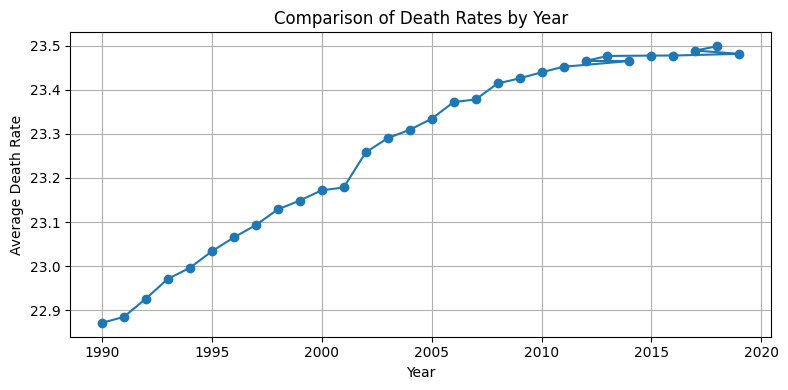

In [19]:
# Comparison of Death Rates by Year
average_death_rate_by_year = df.groupby('Year')['Deaths_Rate'].mean().sort_values()
print("\nAverage Death Rate by Year:")
print(average_death_rate_by_year)

# Plotting the line chart
plt.figure(figsize=(8, 4))
plt.plot(average_death_rate_by_year.index, average_death_rate_by_year.values, marker='o', linestyle='-')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Average Death Rate')
plt.title('Comparison of Death Rates by Year')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
# Country with the Highest Average Death Rate
highest_avg_death_rate_country = df.groupby('Entity')['Deaths_Rate'].mean().idxmax()
highest_avg_death_rate_value = df.groupby('Entity')['Deaths_Rate'].mean().max()
print(f"Country with the Highest Average Death Rate: {highest_avg_death_rate_country} ({highest_avg_death_rate_value})")

Country with the Highest Average Death Rate: Afghanistan (31.111333333333334)


Top 5 Countries with the Highest Average Death Rates:
Entity
Afghanistan    31.111333
Kiribati       30.481667
Oman           29.559333
Libya          28.611000
Gabon          28.213000
Name: Deaths_Rate, dtype: float64


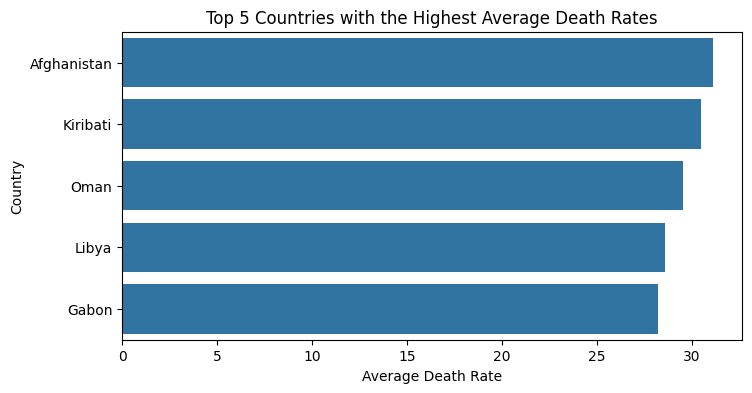

In [28]:
#5 Countries with the Highest Average Death Rate
average_death_rates = df.groupby('Entity')['Deaths_Rate'].mean()
top_5_countries_highest_death_rate = average_death_rates.nlargest(5)
print("Top 5 Countries with the Highest Average Death Rates:")
print(top_5_countries_highest_death_rate)

# Plotting the highest average death rates
plt.figure(figsize=(8, 4))
sns.barplot(x=top_5_countries_highest_death_rate.values, y=top_5_countries_highest_death_rate.index)
plt.xlabel('Average Death Rate')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Highest Average Death Rates')
plt.show()

In [22]:
# Country with the Lowest Average Death Rate
lowest_avg_death_rate_country = df.groupby('Entity')['Deaths_Rate'].mean().idxmin()
lowest_avg_death_rate_value = df.groupby('Entity')['Deaths_Rate'].mean().min()
print(f"Country with the Lowest Average Death Rate: {lowest_avg_death_rate_country} ({lowest_avg_death_rate_value})")


Country with the Lowest Average Death Rate: India (16.62933333333333)


Top 5 Countries with the Lowest Average Death Rates:
Entity
India              16.629333
Nepal              17.178667
Bangladesh         18.108000
Solomon Islands    19.262333
Madagascar         19.431333
Name: Deaths_Rate, dtype: float64


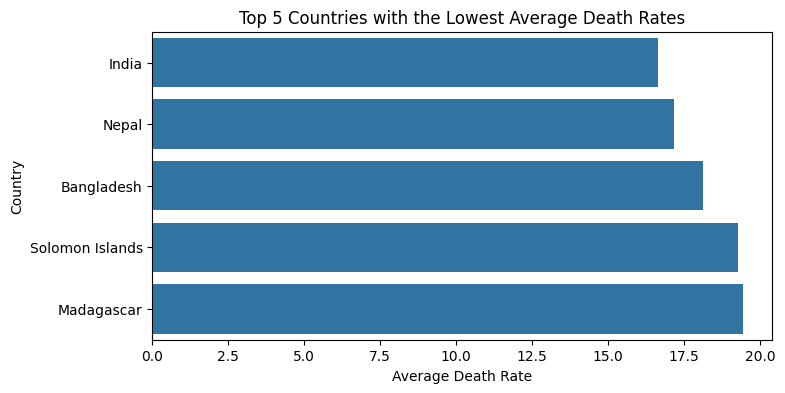

In [27]:
#5 Countries with the Lowest Average Death Rate
average_death_rates = df.groupby('Entity')['Deaths_Rate'].mean()
top_5_countries_lowest_death_rate = average_death_rates.nsmallest(5)
print("Top 5 Countries with the Lowest Average Death Rates:")
print(top_5_countries_lowest_death_rate)

# Plotting the lowest average death rates
plt.figure(figsize=(8, 4))
sns.barplot(x=top_5_countries_lowest_death_rate.values, y=top_5_countries_lowest_death_rate.index)
plt.xlabel('Average Death Rate')
plt.ylabel('Country')
plt.title('Top 5 Countries with the Lowest Average Death Rates')
plt.show()

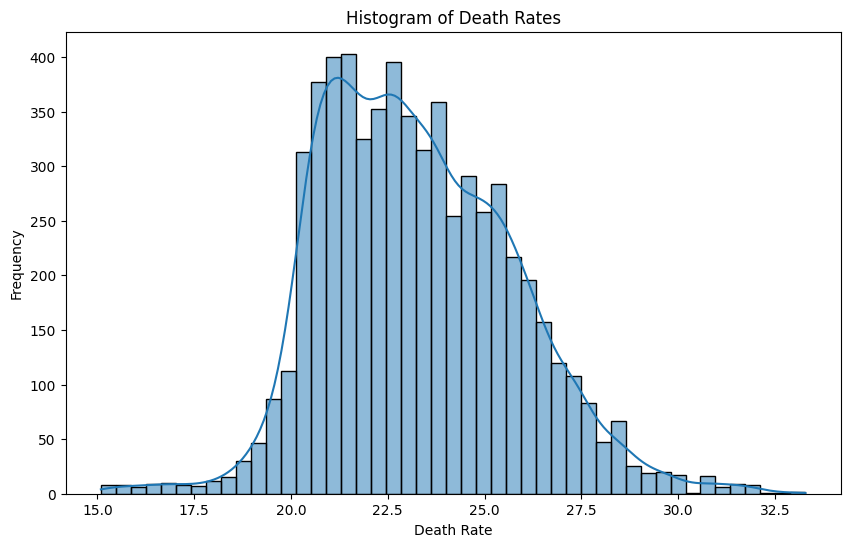

In [29]:
# 1. Histogram of Death Rates
plt.figure(figsize=(10, 6))
sns.histplot(df['Deaths_Rate'], kde=True)
plt.title('Histogram of Death Rates')
plt.xlabel('Death Rate')
plt.ylabel('Frequency')
plt.show()

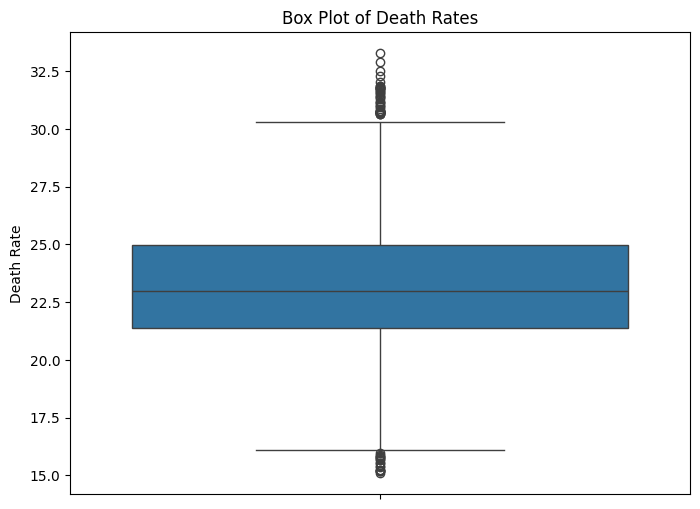

In [30]:
#Box Plot of Death Rates
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Deaths_Rate'])
plt.title('Box Plot of Death Rates')
plt.ylabel('Death Rate')
plt.show()

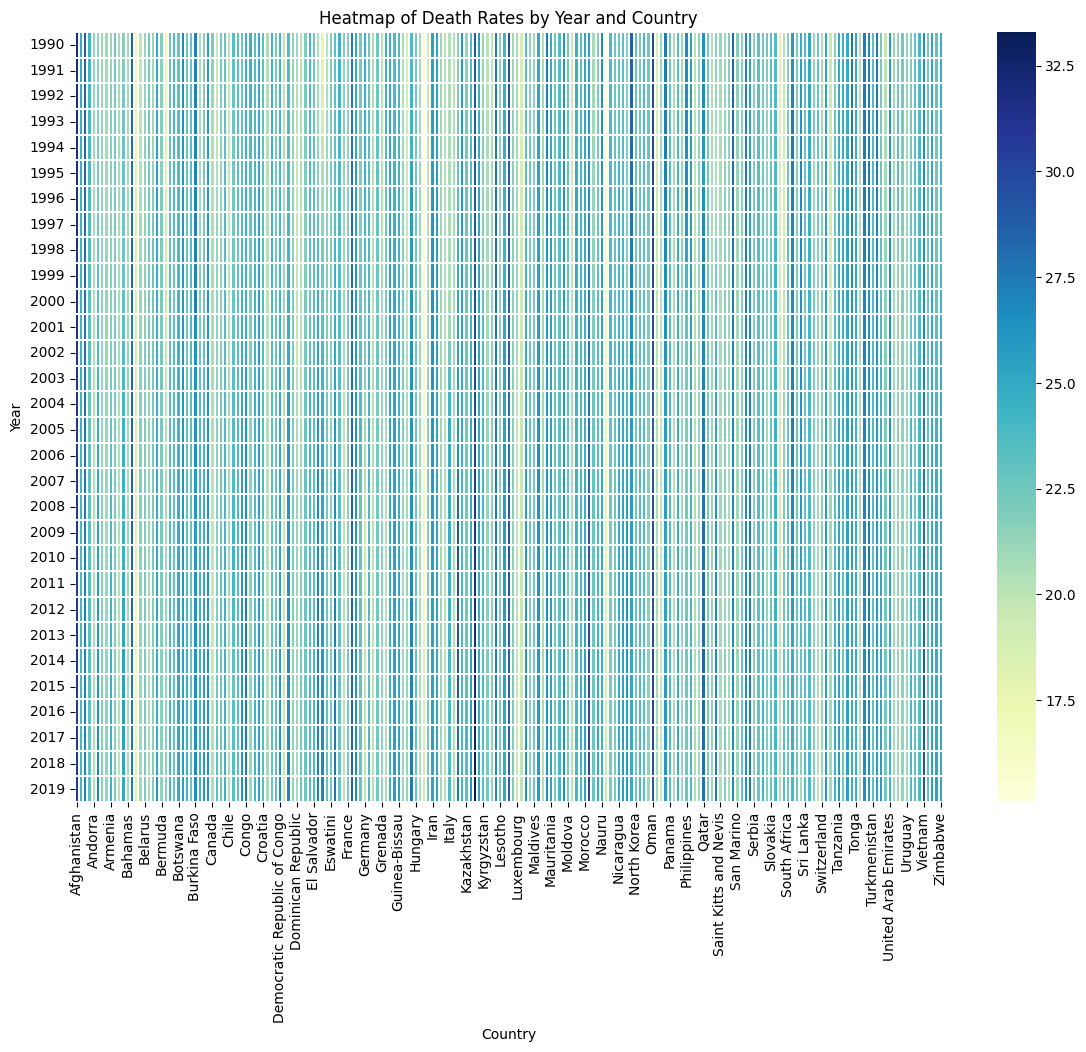

In [32]:
# Death Rates by Year and Country
heatmap_data = df.pivot_table(values='Deaths_Rate', index='Year', columns='Entity')
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.1)
plt.title('Heatmap of Death Rates by Year and Country')
plt.xlabel('Country')
plt.ylabel('Year')
plt.show()